In [ ]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5efdf0be50>)

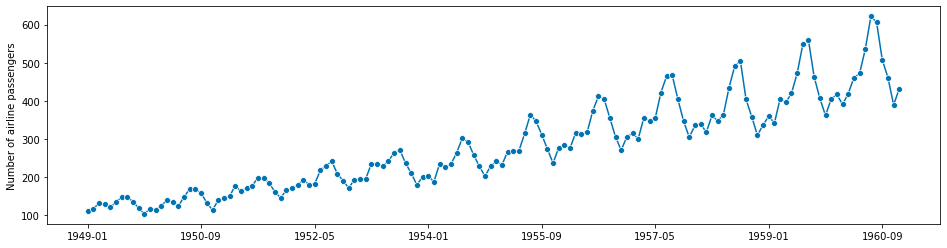

In [ ]:
y = load_airline()
plot_series(y)

In [ ]:
!pip install 'statsmodels==0.12.1'
!pip install sktime

     |████████████████████████████████| 9.5 MB 11.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 6.1 MB 15.3 MB/s 
     |████████████████████████████████| 3.3 MB 79.8 MB/s 
     |████████████████████████████████| 26.3 MB 1.4 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [ ]:
type(y), y.shape

(pandas.core.series.Series, (144,))

In [ ]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train, y_test = temporal_train_test_split(y, test_size=36)
y_train

1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1957-08    467.0
1957-09    404.0
1957-10    347.0
1957-11    305.0
1957-12    336.0
Freq: M, Name: Number of airline passengers, Length: 108, dtype: float64

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5efbe7e7d0>)

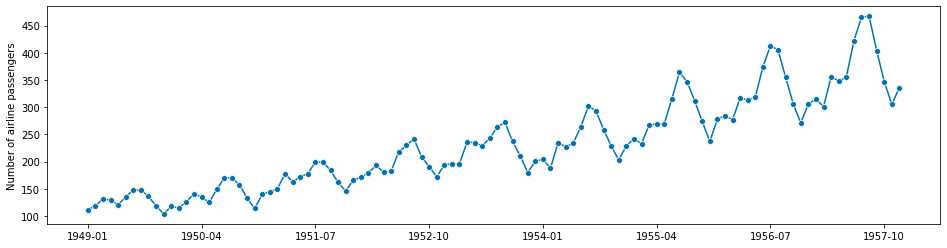

In [ ]:
plot_series(y_train)

In [ ]:
from sktime.forecasting.theta import ThetaForecaster
fc = ThetaForecaster(sp=12)
fc.fit(y_train)
ThetaForecaster()

ThetaForecaster()

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1957-12",  periods=36,freq="M")), is_relative=False
)
fh

ForecastingHorizon(['1957-12', '1958-01', '1958-02', '1958-03', '1958-04', '1958-05',
             '1958-06', '1958-07', '1958-08', '1958-09', '1958-10', '1958-11',
             '1958-12', '1959-01', '1959-02', '1959-03', '1959-04', '1959-05',
             '1959-06', '1959-07', '1959-08', '1959-09', '1959-10', '1959-11',
             '1959-12', '1960-01', '1960-02', '1960-03', '1960-04', '1960-05',
             '1960-06', '1960-07', '1960-08', '1960-09', '1960-10', '1960-11'],
            dtype='period[M]', freq='M', is_relative=False)

In [ ]:
y_predd=fc.predict(fh)

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5efbcc53d0>)

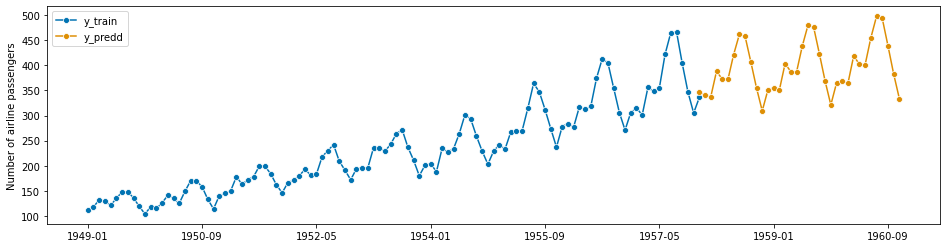

In [ ]:
plot_series(y_train, y_predd, labels=["y_train","y_predd"])

In [ ]:
y_train.shape, y_test.shape

((108,), (36,))

In [ ]:
alpha=0.5 
y_predd, y_predd_ints = fc.predict(fh, return_pred_int=True, alpha = alpha)

/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_base.py:220: FutureWarning: return_pred_int in predict() will be deprecated;please use predict_interval() instead to generate prediction intervals.
  FutureWarning,


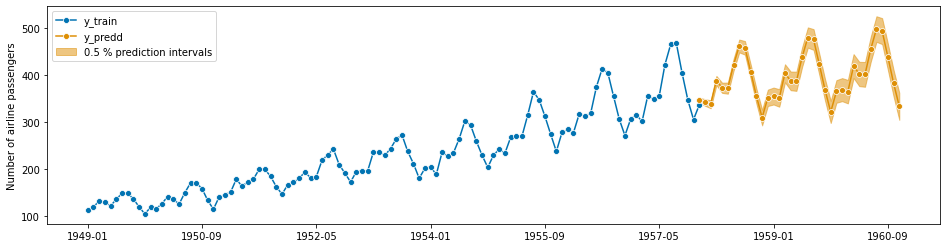

In [ ]:
fig, ax=plot_series(y_train,y_predd,labels=["y_train", "y_predd"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_predd_ints["lower"],
    y_predd_ints["upper"],
    alpha=0.5,
    color=ax.get_lines()[-1].get_c(),
    label=f"{1-alpha} % prediction intervals",
)
ax.legend()